In [1]:
import ibm_db

In [2]:
#set database credentials
dsn_hostname = "dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net" 
dsn_uid = "user"        
dsn_pwd = "password"      

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            
dsn_port = "50000"               
dsn_protocol = "TCPIP"   

In [3]:
#Create the DB2 database connection
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

In [ ]:
#print the connection string to check correct values are specified
print(dsn)

In [5]:
try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  BLUDB as user:  zgm80331 on host:  dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net


In [6]:
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:   11.01.0404
DB_NAME:    BLUDB


In [7]:
#Retrieve Metadata for the Database Client / Driver
client = ibm_db.client_info(conn)

print ("DRIVER_NAME:          ", client.DRIVER_NAME) 
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)

DRIVER_NAME:           libdb2.a
DRIVER_VER:            11.05.0400
DATA_SOURCE_NAME:      BLUDB
DRIVER_ODBC_VER:       03.51
ODBC_VER:              03.01.0000
ODBC_SQL_CONFORMANCE:  EXTENDED
APPL_CODEPAGE:         1208
CONN_CODEPAGE:         1208


In [8]:
#load the ipython-sql extension
%load_ext sql

In [9]:
#connect to DB2
%sql ibm_db_sa://user:password%5E1@dashdb-txn-sbox-yp-dal09-11.services.dal.bluemix.net:50000/BLUDB

## Verify loaded data using SQL

In [10]:
mc = ibm_db.exec_immediate(conn, "SELECT count(*) FROM MCDONALDNUTRITION")
ibm_db.fetch_both(mc)

{'1': '260', 0: '260'}

## Exploratory analysis using pandas

In [11]:
import pandas
import ibm_db_dbi

In [12]:
pconn = ibm_db_dbi.Connection(conn)
df = pandas.read_sql('SELECT * FROM MCDONALDNUTRITION', pconn)
df

,Category,Item,Serving_Size,Calories,Calories_from_Fat,Total_Fat,Total_Fat____Daily_Value_,Saturated_Fat,Saturated_Fat____Daily_Value_,Trans_Fat,...,Carbohydrates,Carbohydrates____Daily_Value_,Dietary_Fiber,Dietary_Fiber____Daily_Value_,Sugars,Protein,Vitamin_A____Daily_Value_,Vitamin_C____Daily_Value_,Calcium____Daily_Value_,Iron____Daily_Value_
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


In [13]:
#learn about data
df.describe(include='all')

,Category,Item,Serving_Size,Calories,Calories_from_Fat,Total_Fat,Total_Fat____Daily_Value_,Saturated_Fat,Saturated_Fat____Daily_Value_,Trans_Fat,...,Carbohydrates,Carbohydrates____Daily_Value_,Dietary_Fiber,Dietary_Fiber____Daily_Value_,Sugars,Protein,Vitamin_A____Daily_Value_,Vitamin_C____Daily_Value_,Calcium____Daily_Value_,Iron____Daily_Value_
count,260,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,9,260,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Coffee & Tea,Latte with Sugar Free French Vanilla Syrup (La...,16 fl oz cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,95,1,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,NaN,NaN,NaN,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,NaN,NaN,NaN,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,NaN,NaN,NaN,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000


# Find the food has the maximum sodium content

In [14]:
#Visualization
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

/home/nhungnguyen298/venv/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/nhungnguyen298/venv/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 63.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/nhungnguyen298/venv/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/nhungnguyen298/venv/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 32.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


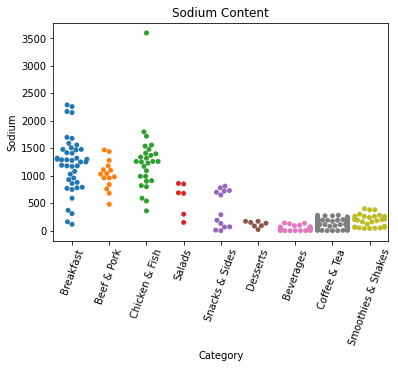

In [15]:
### Categorical scatterplots
plot = sns.swarmplot(x='Category' , y='Sodium', data=df)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title('Sodium Content')
plt.show()

In [16]:
#check the values of sodium levels 
df['Sodium'].describe()

count     260.000000
mean      495.750000
std       577.026323
min         0.000000
25%       107.500000
50%       190.000000
75%       865.000000
max      3600.000000
Name: Sodium, dtype: float64

In [17]:
#check the maximum sodium
df['Sodium'].idxmax()

82

In [18]:
#check the item having the maximum sodium
df.at[82,'Item']

'Chicken McNuggets (40 piece)'

## Further data exploration using visualization

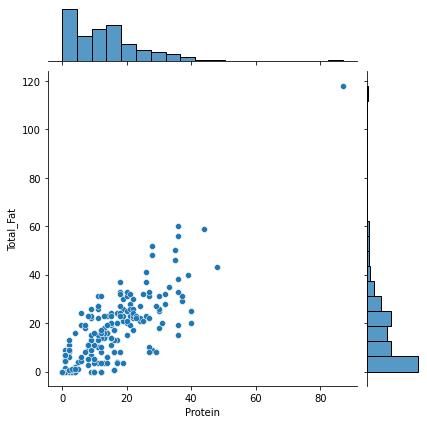

In [19]:
import matplotlib.pyplot as plt
%matplotliblotlib inline
import seaborn as sns

plot = sns.jointplot(data=df,x="Protein", y="Total_Fat")

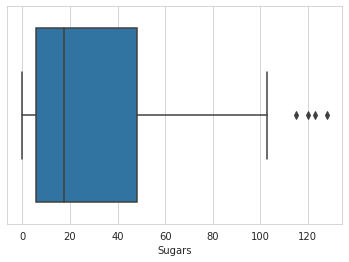

In [20]:
# visualization by boxplot
plot = sns.set_style("whitegrid")
ax = sns.boxplot(x=df["Sugars"])

In [21]:
#closing connection 
ibm_db.close(conn)

True